# Data Assessment & Analytics
Notes:
- change os directory location
- be aware of the number of provdied native source data files
- beware of of what data is available

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\NorthDakota\WaterAllocation


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/NorthDakota/WaterAllocation" # set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: Permits_input
dfin1 = pd.read_csv(InputFolderString + '/RawinputData/Permits_input.zip')

In [5]:
# WaDE Processed Input Data
#################################################################

dfws = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")
dfspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sites_missing.csv").replace(np.nan, "")

dfaa = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations.csv").replace(np.nan, "")
dfaapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations_missing.csv").replace(np.nan, "")

# Water Source Info (watersources.csv)

In [6]:
print(len(dfws))
dfws.head(1)

372


WaterSourceUUID Geometry GNISFeatureNameCV WaterQualityIndicatorCV  \
0  NDwr_WSwadeID1                                              Fresh   

  WaterSourceName WaterSourceNativeID WaterSourceTypeCV  
0      WaDE Blank             wadeID1      Ground Water

<Axes: >

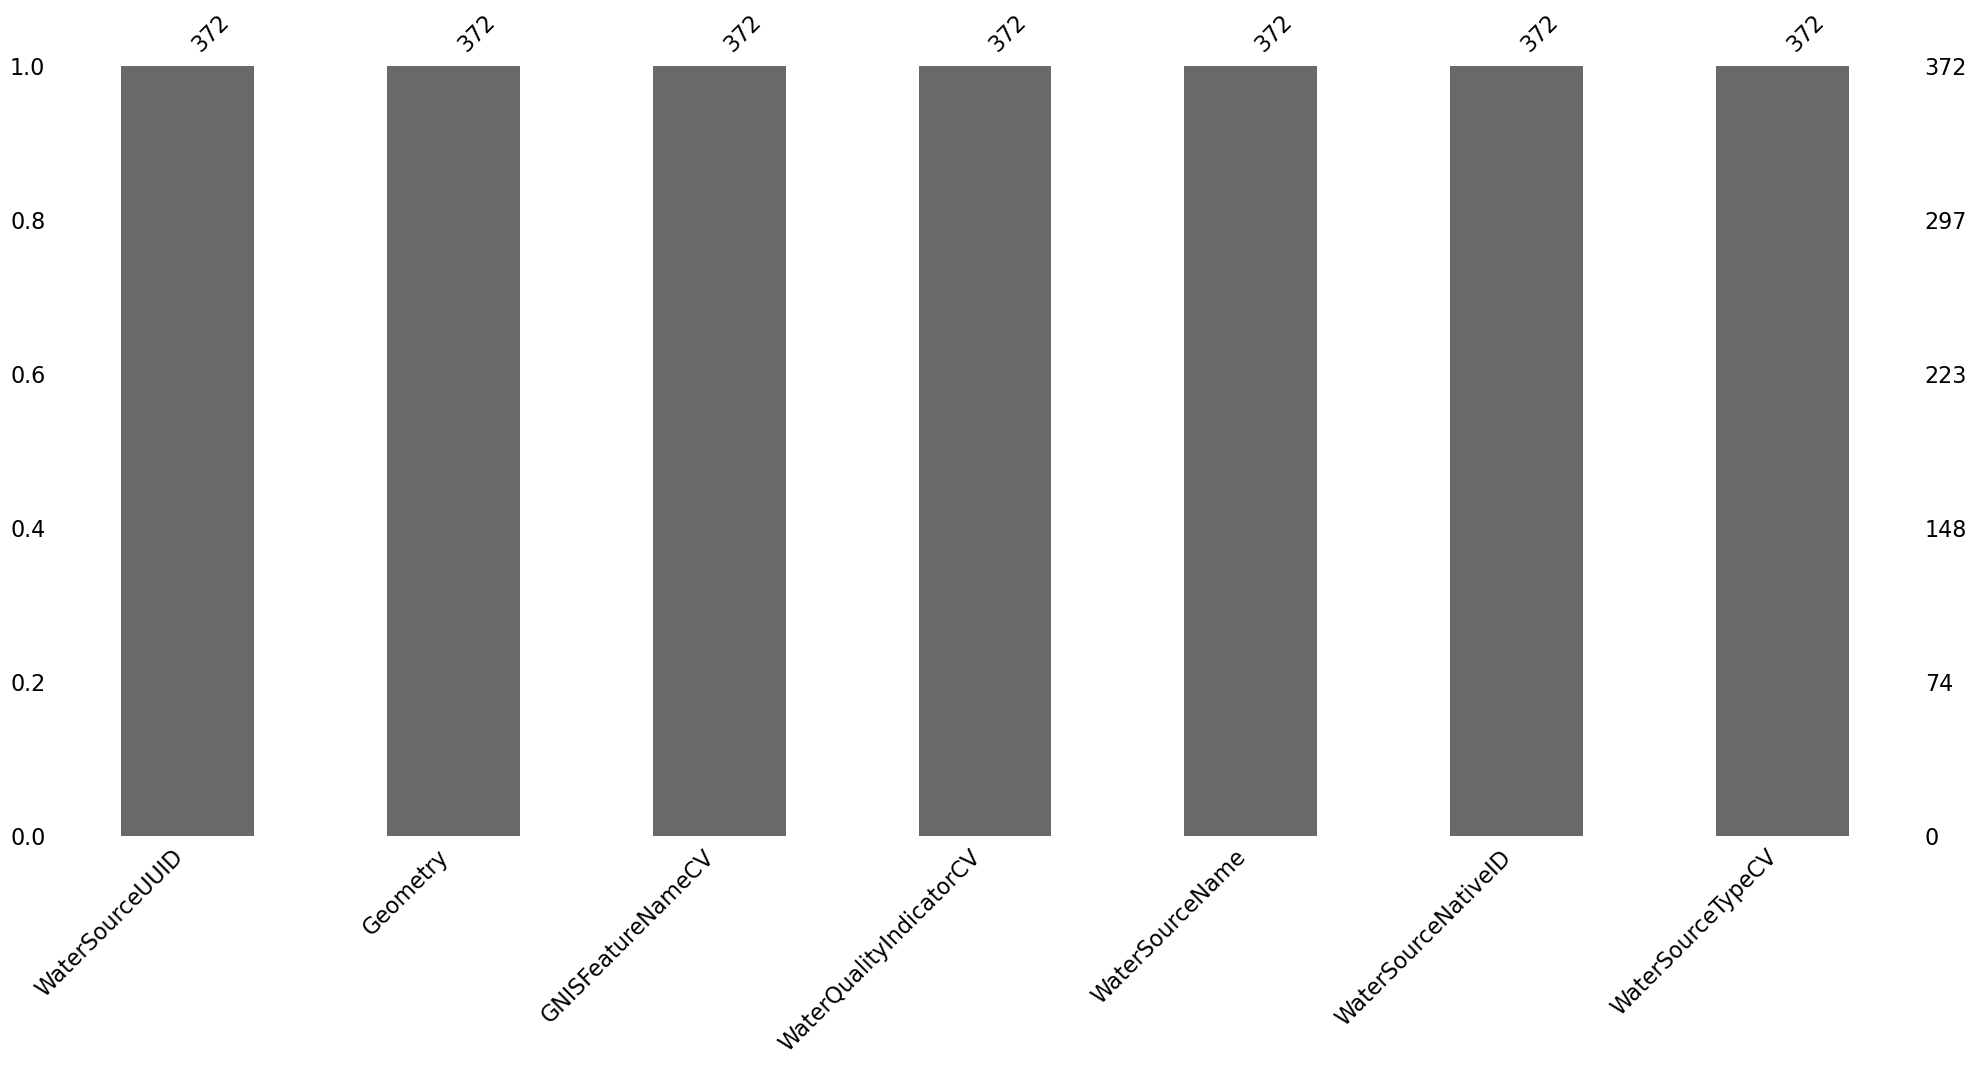

In [7]:
# Check what columns contain missing information.
#msno.matrix(dfws, figsize=(10,5), fontsize=10)
msno.bar(dfws)

In [8]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Ground Water",
"Surface Water",


# Site Info (sites.csv)

In [9]:
print(len(dfs))
dfs.head(1)

3766


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  NDwr_SPOD12904705A                          NDwr_WSwadeID1   

  CoordinateAccuracy CoordinateMethodCV    County  EPSGCodeCV Geometry  \
0         WaDE Blank   Centroid of Area  Richland        4326            

  GNISCodeCV HUC12 HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV  \
0                        46.01845  -96.60187                                   

  PODorPOUSite    SiteName  SiteNativeID SitePoint  SiteTypeCV StateCV  \
0          POD  WaDE Blank  POD12904705A            WaDE Blank      ND   

  USGSSiteID  
0

<Axes: >

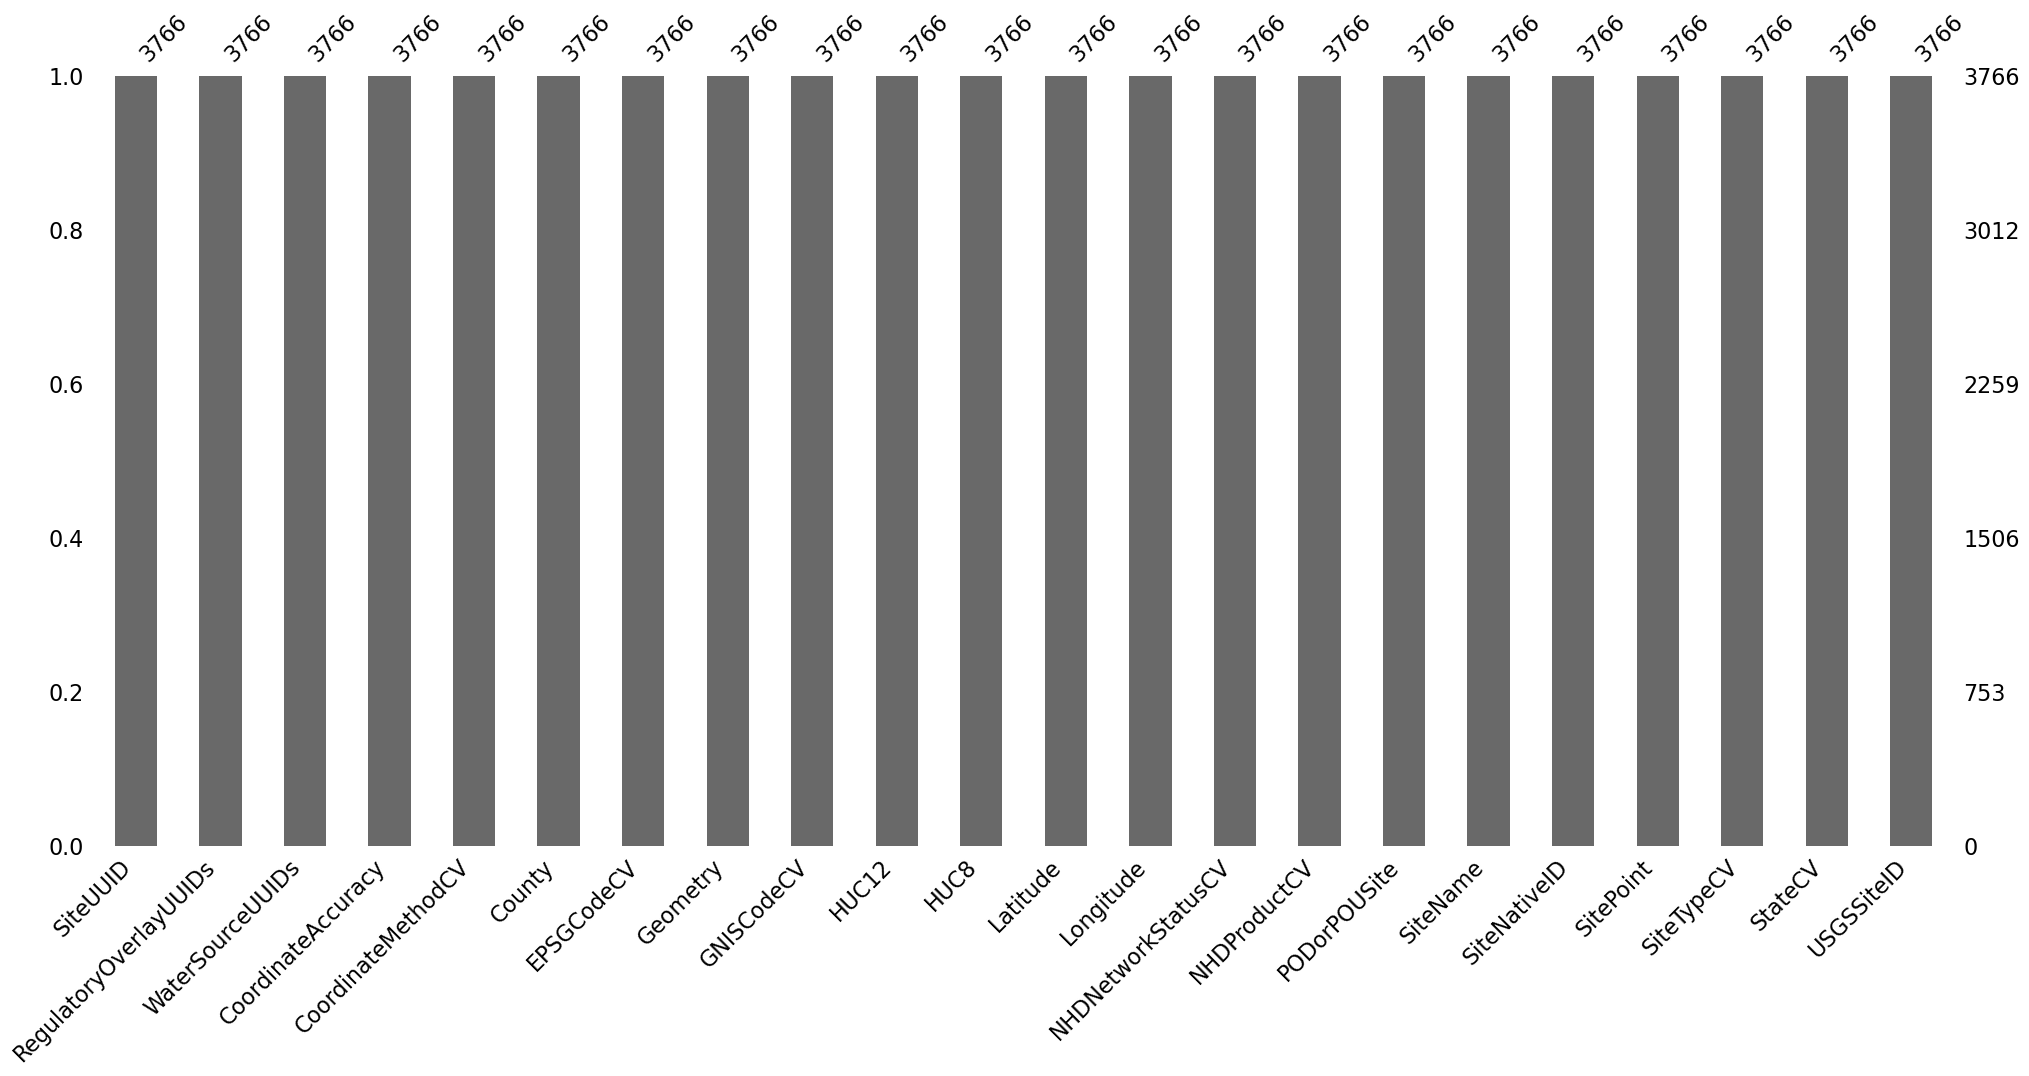

In [10]:
# Check what columns contain missing information.
#msno.matrix(dfs, figsize=(10,5), fontsize=10)
msno.bar(dfs)

In [11]:
# Unique values for 'CoordinateMethodCV'
for x in dfs['CoordinateMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"Centroid of Area",


In [12]:
# Unique values for 'SiteTypeCV'
for x in dfs['SiteTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Blank",


# Allocation Amount Info (waterallocations.csv)

In [13]:
print(len(dfaa))
dfaa.head(1)

3228


AllocationUUID MethodUUID OrganizationUUID             SiteUUID  \
0    NDwr_WR1002    NDwr_M1          NDwr_O1  NDwr_SPOD13908411CC   

  VariableSpecificUUID AllocationApplicationDate  \
0              NDwr_V1                1962-08-02   

  AllocationAssociatedConsumptiveUseSiteIDs  \
0                                             

  AllocationAssociatedWithdrawalSiteIDs AllocationBasisCV  \
0                                              WaDE Blank   

  AllocationChangeApplicationIndicator AllocationCommunityWaterSupplySystem  \
0                                                                             

  AllocationCropDutyAmount AllocationExpirationDate  AllocationFlow_CFS  \
0                                                               0.00000   

  AllocationLegalStatusCV AllocationNativeID        AllocationOwner  \
0                  Active               1002  Nd Game And Fish Dept   

  AllocationPriorityDate AllocationSDWISIdentifierCV AllocationTimeframeEnd  \
0             1961-12-28                                                      

  AllocationTimeframeStart AllocationTypeCV  AllocationVolume_AF  \
0                                WaDE Blank            950.00000   

  BeneficialUseCategory CommunityWaterSupplySystem CropTypeCV CustomerTypeCV  \
0            Recreation                                                        

  DataPublicationDate DataPublicationDOI  ExemptOfVolumeFlowPriority  \
0          12/14/2023                                              0   

  GeneratedPowerCapacityMW  IrrigatedAcreage IrrigationMethodCV  \
0                                    0.00000                      

  LegacyAllocationIDs OwnerClassificationCV PopulationServed PowerType  \
0                                   Private                              

  PrimaryBeneficialUseCategory  \
0                   Recreation   

                            WaterAllocationNativeURL  
0  https://www.swc.nd.gov/info_edu/map_data_resou...

In [14]:
# Unique values for 'AllocationBasisCV'
for x in dfaa['AllocationBasisCV'].sort_values().unique():
    print(f'"' + str(x) + '",')

"WaDE Blank",


In [15]:
# Unique values for 'AllocationTypeCV'
for x in dfaa['AllocationTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Blank",


In [16]:
# Unique values for 'AllocationLegalStatusCV'
for x in dfaa['AllocationLegalStatusCV'].sort_values().unique():
    print(f'"' + x + '",')

"Active",
"WaDE Blank",


In [17]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfaa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Domestic',
 'Fish and Wildlife',
 'Flood Control',
 'Industrial',
 'Irrigation',
 'Multiple Use',
 'Municipal',
 'Power Generation',
 'Recreation',
 'Rural Water',
 'Stock']

In [18]:
# Unique values for 'OwnerClassificationCV'
for x in dfaa['OwnerClassificationCV'].sort_values().unique():
    print(f'"' + x + '",')

"Bureau Reclamation (USBR)",
"Bureau of Land Management (USBLM)",
"Fish and Wildlife Service (USFWS)",
"Forest Service (USFS)",
"Military",
"National Park Service (USNPS)",
"Native American",
"Private",
"Reclamation Contractor",
"United States of America",


<Axes: >

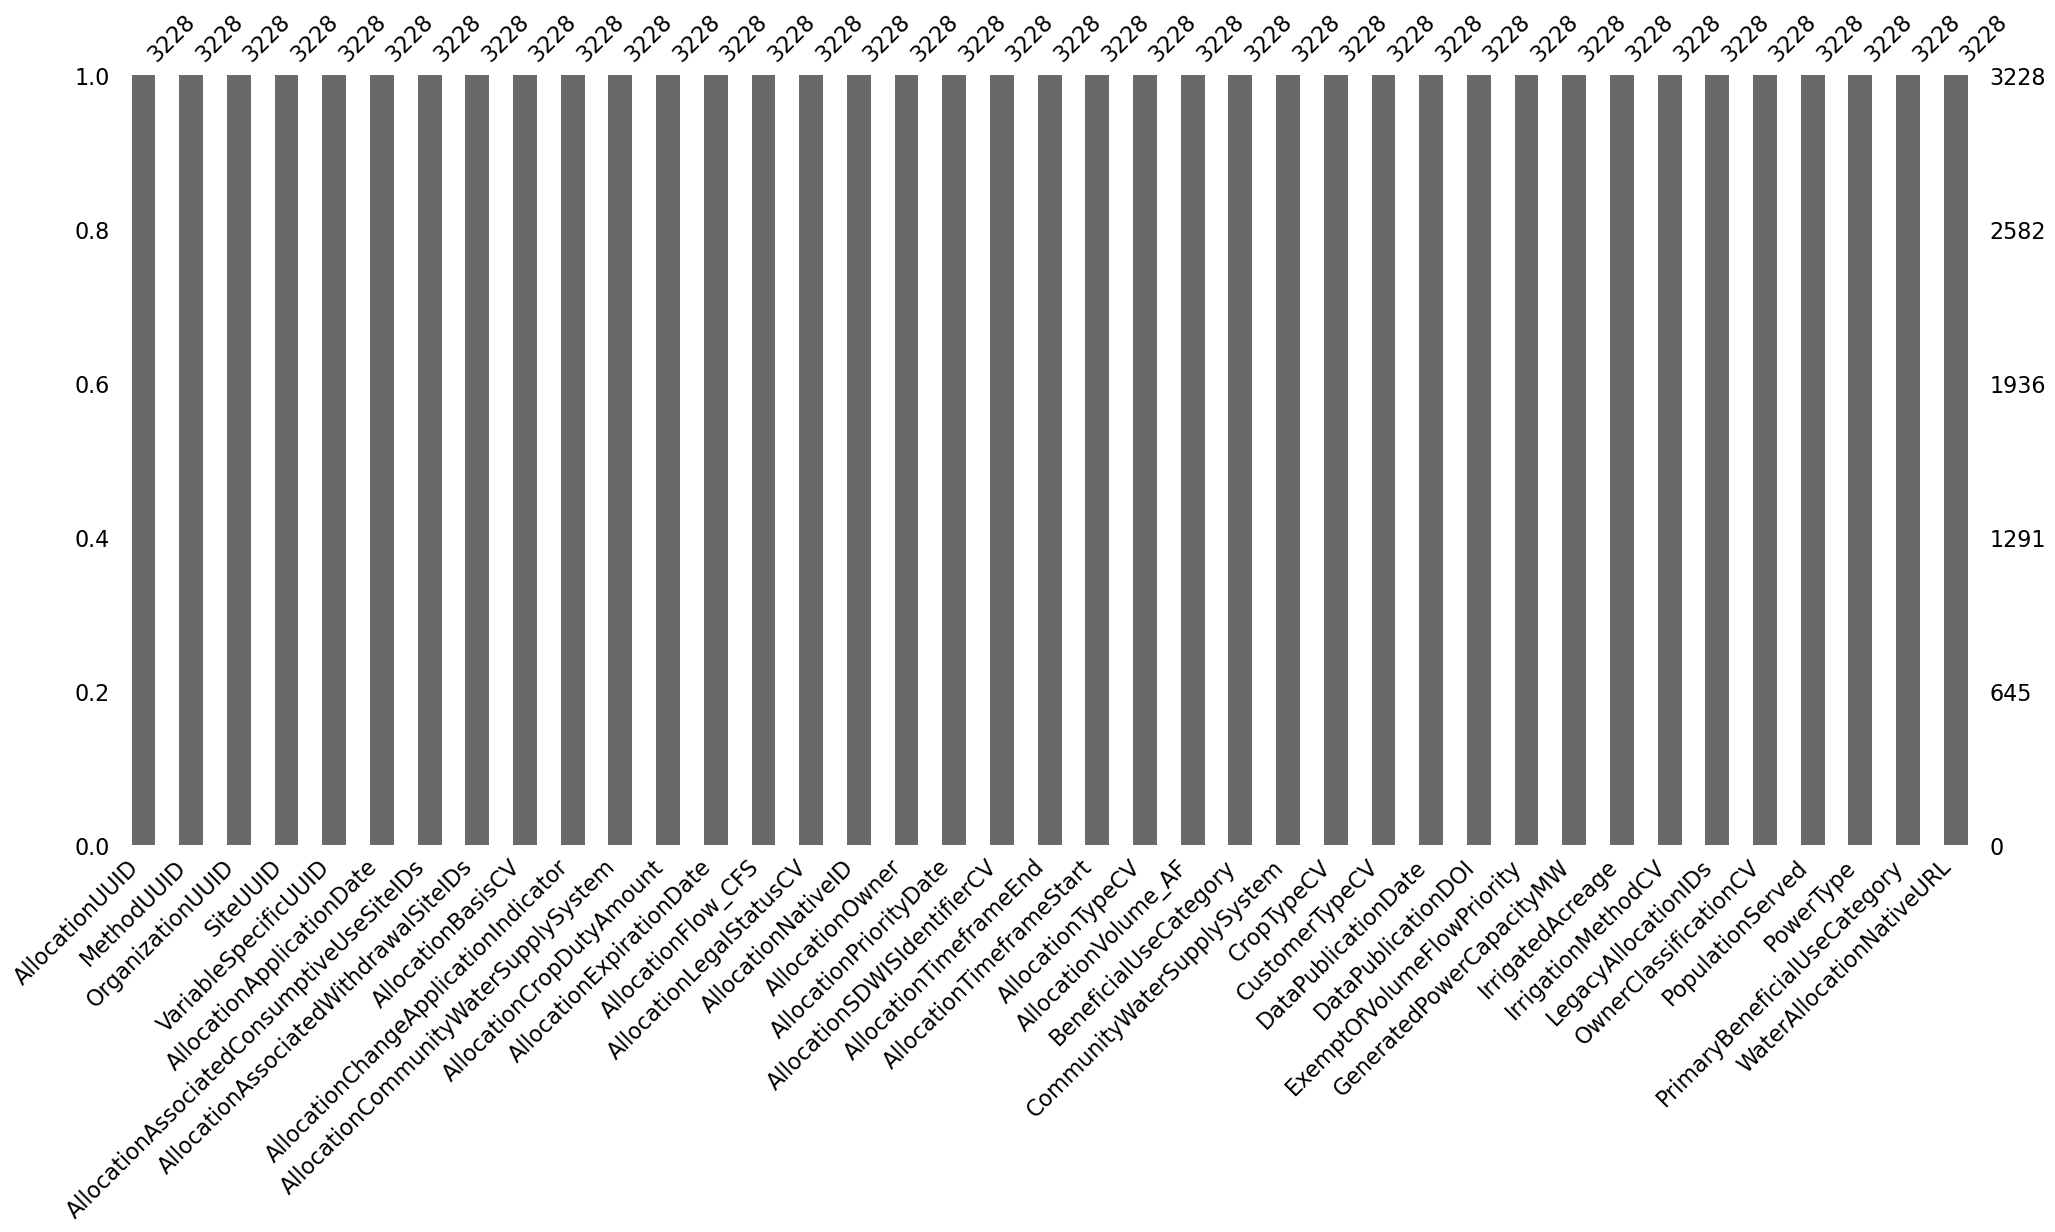

In [19]:
# Check what columns contain missing information.
#msno.matrix(dfaa, figsize=(10,5), fontsize=10)
msno.bar(dfaa)

## Num of Record Summary

In [20]:
print(f"Num of Source Entries (rows): ", len(dfin1))
print(f"Num of Identified PODs: ", len(dfs[dfs['PODorPOUSite'] == 'POD']))
print(f"Num of Identified POUs: ", len(dfs[dfs['PODorPOUSite'] == 'POU']))
print(f"Num of Identified Water Right Records: ", len(dfaa))

Num of Source Entries (rows):  12181
Num of Identified PODs:  3766
Num of Identified POUs:  0
Num of Identified Water Right Records:  3228


## Why Removed Records Summary

In [21]:
print("---- Reasons why records were removed from water source info ----")
if len(dfwspurge) != 0:
    print(dfwspurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

---- Reasons why records were removed from water source info ----
ReasonRemoved
Unused WaterSource Record    41
Name: count, dtype: int64


In [22]:
print(" ---- Reasons why records were removed from site info ---- ")
if len(dfspurge) != 0:
    print(dfspurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site info ---- 
ReasonRemoved
Unused Site Record                              987
Incomplete or bad entry for Latitude            147
Incomplete or bad entry for Longitude            10
Incomplete or bad entry for WaterSourceUUIDs      2
Incomplete or bad entry for County                2
Name: count, dtype: int64


In [23]:
print(" ---- Reasons why records were removed from allocation amount info ---- ")
if len(dfaapurge) != 0:
    print(dfaapurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from allocation amount info ---- 
ReasonRemoved
Incomplete or bad entry for SiteUUID                  223
Incomplete or bad entry for Volume                    215
Incomplete or bad entry for Flow                      142
Incomplete or bad entry for IrrigatedAcreage           33
Incomplete or bad entry for AllocationPriorityDate      1
Name: count, dtype: int64


## Figures

In [24]:
# ---- merge watersource.csv to sites.csv ----

# explode site.csv on WaterSourceUUIDs
dfstemp = dfs.copy()
dfstemp = dfstemp.assign(WaterSourceUUIDs=dfstemp['WaterSourceUUIDs'].str.split(',')).explode('WaterSourceUUIDs').reset_index(drop=True)

# merge
dfstemp_ws = pd.merge(dfstemp, dfws[['WaterSourceUUID', 'WaterSourceTypeCV']], left_on='WaterSourceUUIDs', right_on='WaterSourceUUID', how='left')

# groupby site-watersource.csv via SiteUUID
dfstemp_ws = dfstemp_ws.groupby('SiteUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem != ""])).replace(np.nan, "").reset_index()

print(len(dfstemp_ws))
dfstemp_ws.head(1)

3766


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  NDwr_SPOD12904705A                          NDwr_WSwadeID1   

  CoordinateAccuracy CoordinateMethodCV    County EPSGCodeCV Geometry  \
0         WaDE Blank   Centroid of Area  Richland       4326            

  GNISCodeCV HUC12 HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV  \
0                        46.01845  -96.60187                                   

  PODorPOUSite    SiteName  SiteNativeID SitePoint  SiteTypeCV StateCV  \
0          POD  WaDE Blank  POD12904705A            WaDE Blank      ND   

  USGSSiteID WaterSourceUUID WaterSourceTypeCV  
0             NDwr_WSwadeID1      Ground Water

PODorPOUSite
POD    3766
Name: count, dtype: int64


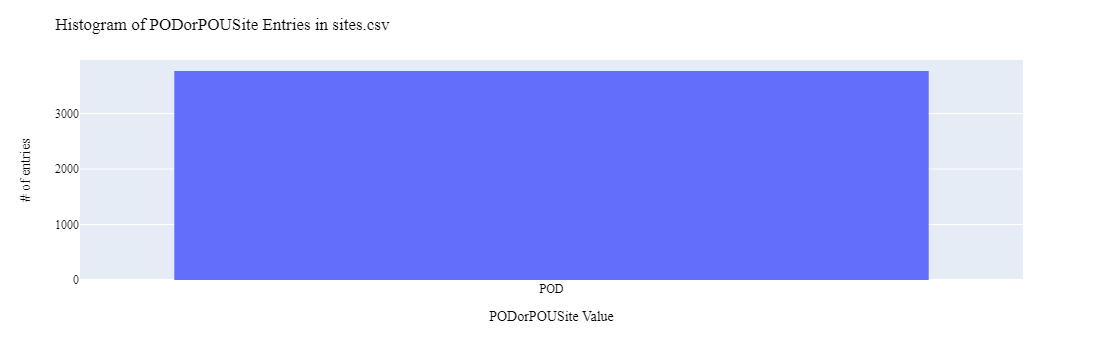

In [25]:
# ---- Histogram: Num of POD sites vs POU sites ----
print(dfstemp_ws.PODorPOUSite.value_counts())

fig = px.histogram(dfstemp_ws, x="PODorPOUSite")
fig.update_layout(bargap=0.2,
                  title="Histogram of PODorPOUSite Entries in sites.csv",
                  xaxis_title="PODorPOUSite Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PODorPOUSite.png', engine="kaleido")

WaterSourceTypeCV
Ground Water                  2151
Surface Water                 1593
Surface Water,Ground Water      22
Name: count, dtype: int64


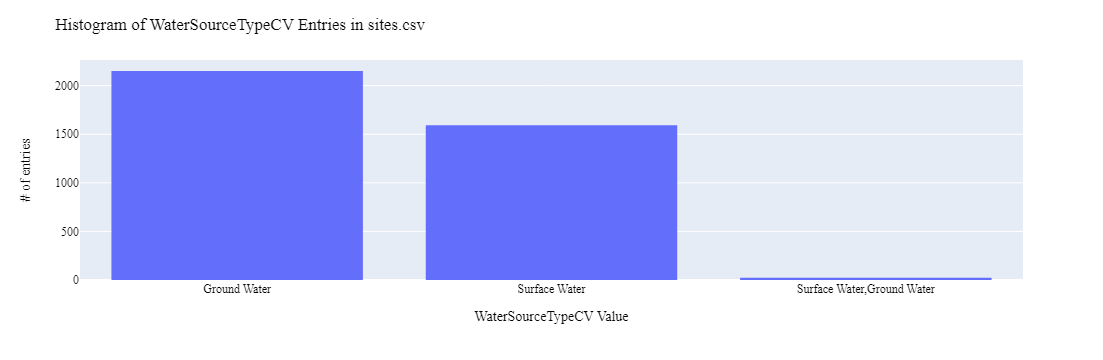

In [26]:
# ---- Histogram: Num of sites via WatersourceTypeCV ----
print(dfstemp_ws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfstemp_ws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in sites.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/WaterSourceTypeCV.png', engine="kaleido")

PrimaryBeneficialUseCategory
Agriculture Irrigation    1860
Commercial/Industrial      417
In-stream Flow             323
Public Supply              293
Recreation                 169
Livestock                   80
Other                       49
Domestic                    30
Hydroelectric                7
Name: count, dtype: int64


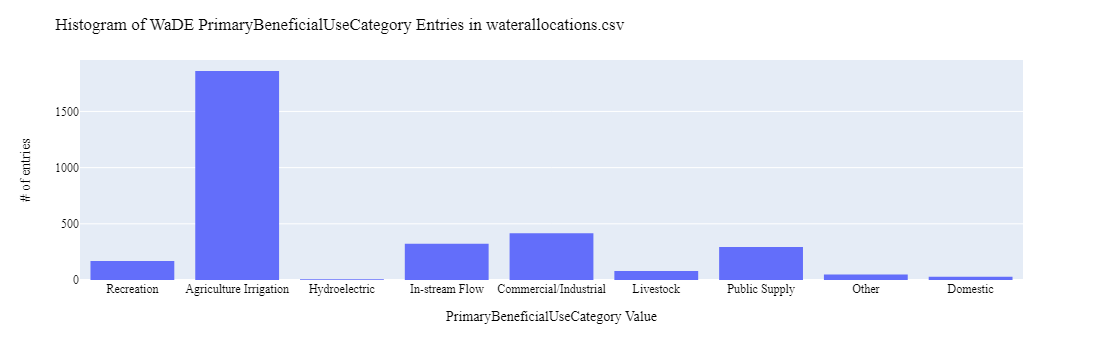

In [27]:
# ---- Histogram: Distribution of PrimaryBeneficialUseCategory WaDE Values ----
print(dfaa.PrimaryBeneficialUseCategory.value_counts())

fig = px.histogram(dfaa, x="PrimaryBeneficialUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaDE PrimaryBeneficialUseCategory Entries in waterallocations.csv",
                  xaxis_title="PrimaryBeneficialUseCategory Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PrimaryBeneficialUseCategory.png', engine="kaleido")

AllocationPriorityDate
2005-05-31    12
1991-04-25    11
2011-05-02     9
1990-05-08     9
1967-06-03     8
              ..
1981-07-13     1
1981-10-19     1
1981-04-14     1
1981-06-18     1
1901-06-20     1
Name: count, Length: 2553, dtype: int64


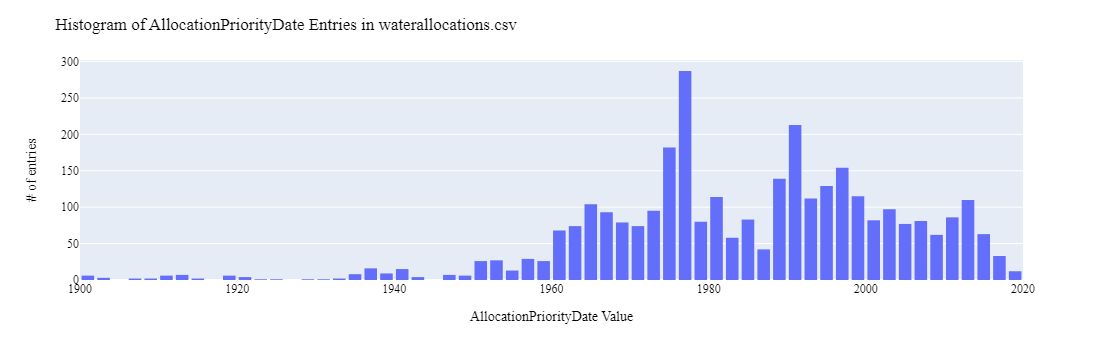

In [28]:
# ---- AllocationPriorityDate #1: histogram distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.histogram(dfaatemp, x="AllocationPriorityDate")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate1.png', engine="kaleido")

AllocationPriorityDate
2005-05-31    12
1991-04-25    11
2011-05-02     9
1990-05-08     9
1967-06-03     8
              ..
1981-07-13     1
1981-10-19     1
1981-04-14     1
1981-06-18     1
1901-06-20     1
Name: count, Length: 2553, dtype: int64


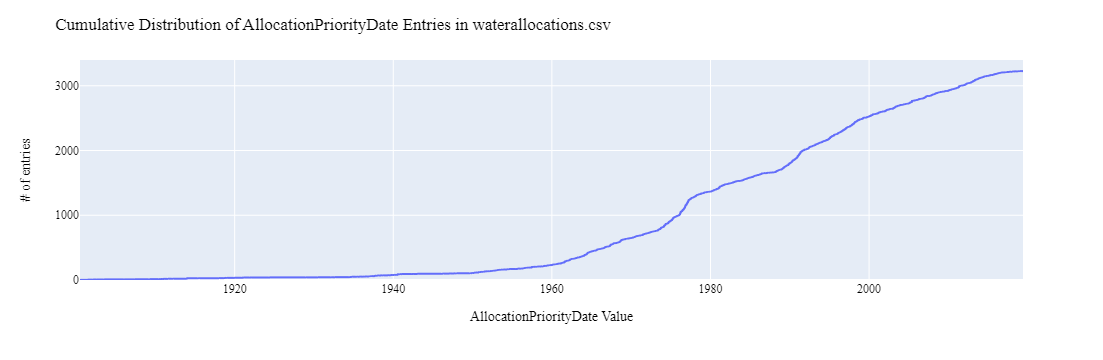

In [29]:
# ---- AllocationPriorityDate #2: cumulative distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.ecdf(dfaatemp, x="AllocationPriorityDate", ecdfnorm=None)
fig.update_layout(bargap=0.2,
                  title="Cumulative Distribution of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate2.png', engine="kaleido")

AllocationLegalStatusCV
Active        3226
WaDE Blank       2
Name: count, dtype: int64


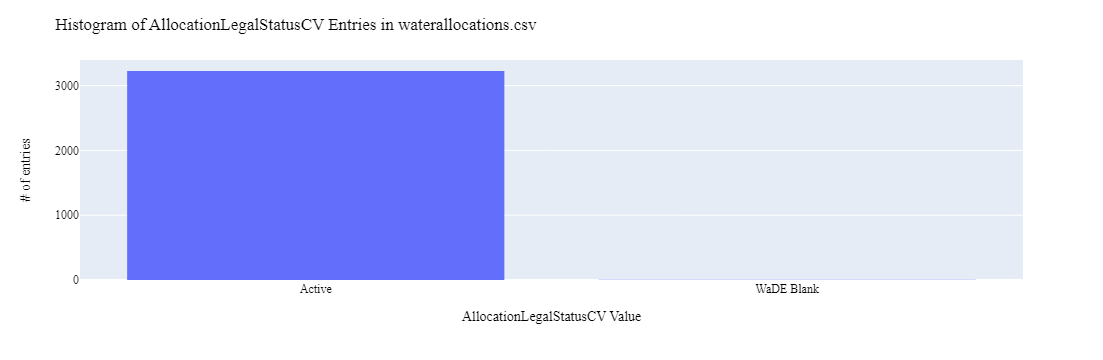

In [30]:
# ---- AllocationLegalStatusCV: histogram distribution of WaDE values ----
print(dfaa.AllocationLegalStatusCV.value_counts())

fig = px.histogram(dfaa, x="AllocationLegalStatusCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationLegalStatusCV Entries in waterallocations.csv",
                  xaxis_title="AllocationLegalStatusCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationLegalStatusCV.png', engine="kaleido")

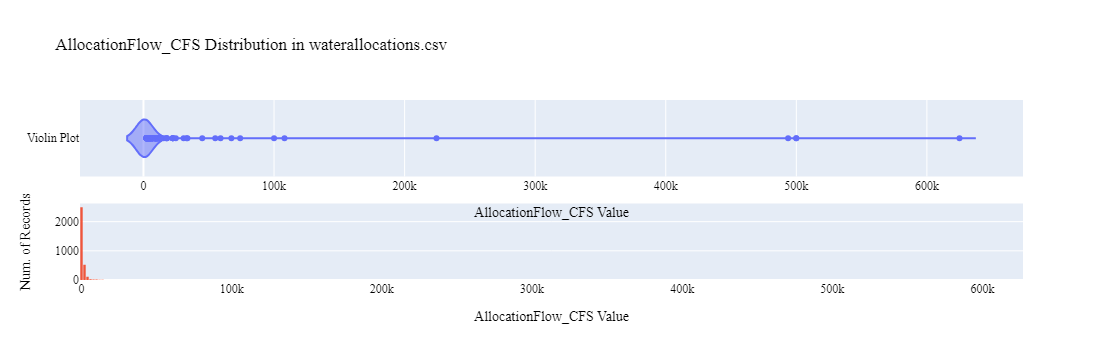

In [31]:
# ---- AllocationFlow_CFS: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfaa['AllocationFlow_CFS'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationFlow_CFS'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationFlow_CFS Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('figures/AllocationFlow_CFS.png', engine="kaleido")

except: print('Could not plot AllocationFlow_CFS value.')

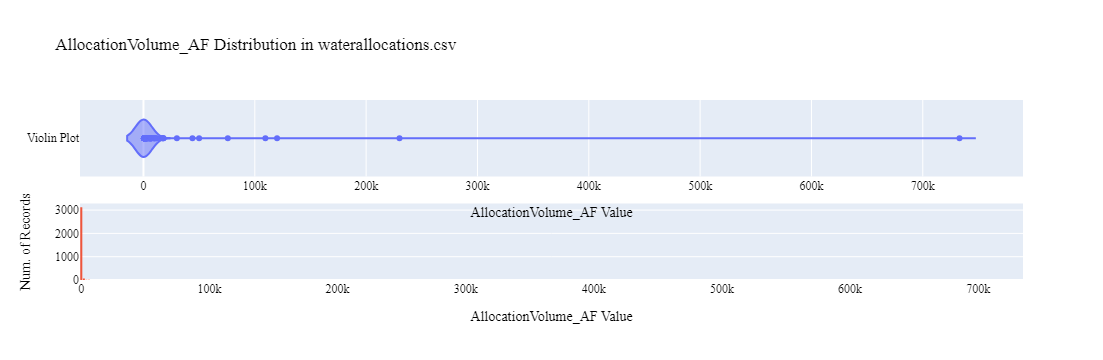

In [32]:
# ---- AllocationVolume_AF: Boxplot distribution of WaDE values ----

try:
    trace1 = go.Violin(x=dfaa['AllocationVolume_AF'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationVolume_AF'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationVolume_AF Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('figures/AllocationVolume_AF.png', engine="kaleido")

except: print('Could not plot AllocationVolume_AF value.')

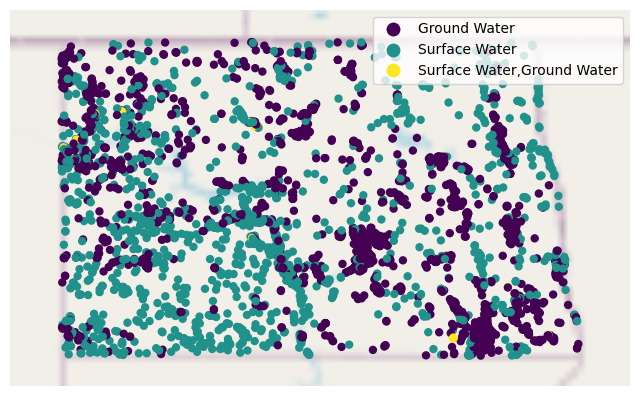

In [33]:
# ---- Map of Points sites ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] == ''].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=gpd.points_from_xy(dfstemp.Longitude.astype(float), dfstemp.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfstemp, hue='WaterSourceTypeCV', legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointMap.png') 
except:
    print('No point data to plot')

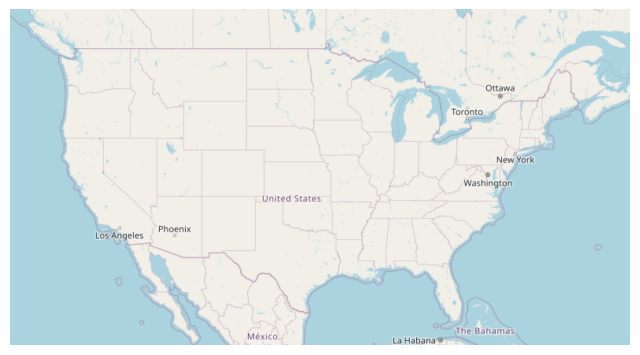

In [34]:
# ---- Map of Polygons ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfstemp['Geometry'] = gpd.GeoSeries.from_wkt(dfstemp['Geometry'], crs="EPSG:4326")
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=dfstemp['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gplt.polyplot(gdfstemp, ax=ax)
    mplt.savefig(format="png", fname='figures/PolyMap.png')
except:
    print('No geometry data to plot')

# Removed Records compared to Source Data
- this is working just fine, just want to comment out temporarily for future use

In [35]:
# # Explode purge.xlsx files by WaDEUUID, concat together
# #################################################################

# # Explode watersources_missing.xlsx records by WaDEUUID
# dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode sites_missing.xlsx records by WaDEUUID
# dfspurgeCopy = dfspurge.assign(WaDEUUID=dfspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfspurgeCopy = dfspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode waterallocations_missing.xlsx records by WaDEUUID
# dfaapurgeCopy = dfaapurge.assign(WaDEUUID=dfaapurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfaapurgeCopy = dfaapurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # concat purge dataframes togehter
# frames = [dfwspurgeCopy, dfspurgeCopy, dfaapurgeCopy] 
# dfWaDEUUID = pd.concat(frames)
# dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
# print(len(dfWaDEUUID))
# dfWaDEUUID.head(1)

# Custom Queries and Analysis for this Dataset

In [36]:
# N/A